# 📚 Colab Notebook: Interactive Website Chatbot

This Colab notebook showcases the integration of Pinecone, Langchain, OpenAI, and Gradio to create an interactive chatbot that can read Website pages and answer questions. With this powerful combination, you can easily extract information from sites using natural language queries.

# ✅ Install Dependencies and Setup 🛠️

Begin by installing the necessary libraries, including Langchain, OpenAI, and Gradio, to ensure smooth execution

In [1]:
%%capture --no-display

!pip install -q openai
!pip install langchain
!pip install gradio
!pip install pinecone-client
!pip install "unstructured"
!pip install tiktoken
!pip install pdf2image
!pip install pytesseract

In [2]:
%load_ext autoreload
%autoreload 2

In [3]:
from langchain.embeddings.openai import OpenAIEmbeddings
from langchain.text_splitter import CharacterTextSplitter
from langchain.vectorstores import Pinecone
from getpass import getpass
from langchain.document_loaders import UnstructuredURLLoader
from langchain import OpenAI
import gradio as gr
import openai
import os
import pinecone

# 🔑 Add OpenAI API Key 🔐
Follow the instructions provided to add your OpenAI API key. This step is crucial for leveraging OpenAI's language capabilities.


Get your API key from here
[OpenAI API key](https://platform.openai.com/account/api-keys)

In [4]:
os.environ["OPENAI_API_KEY"] = getpass("OPENAI API KEY : ")

OPENAI API KEY : ··········


# 🔑 Add Pinecone Details 🔐
✨🔍 Pinecone is a special tool that stores information in a special way so we can search for it super fast. 🚀🕵️‍♂️

Sign up here
[Pinecone](https://www.pinecone.io/)

Get your API key and Environment from here
[Pinecone](https://app.pinecone.io/)

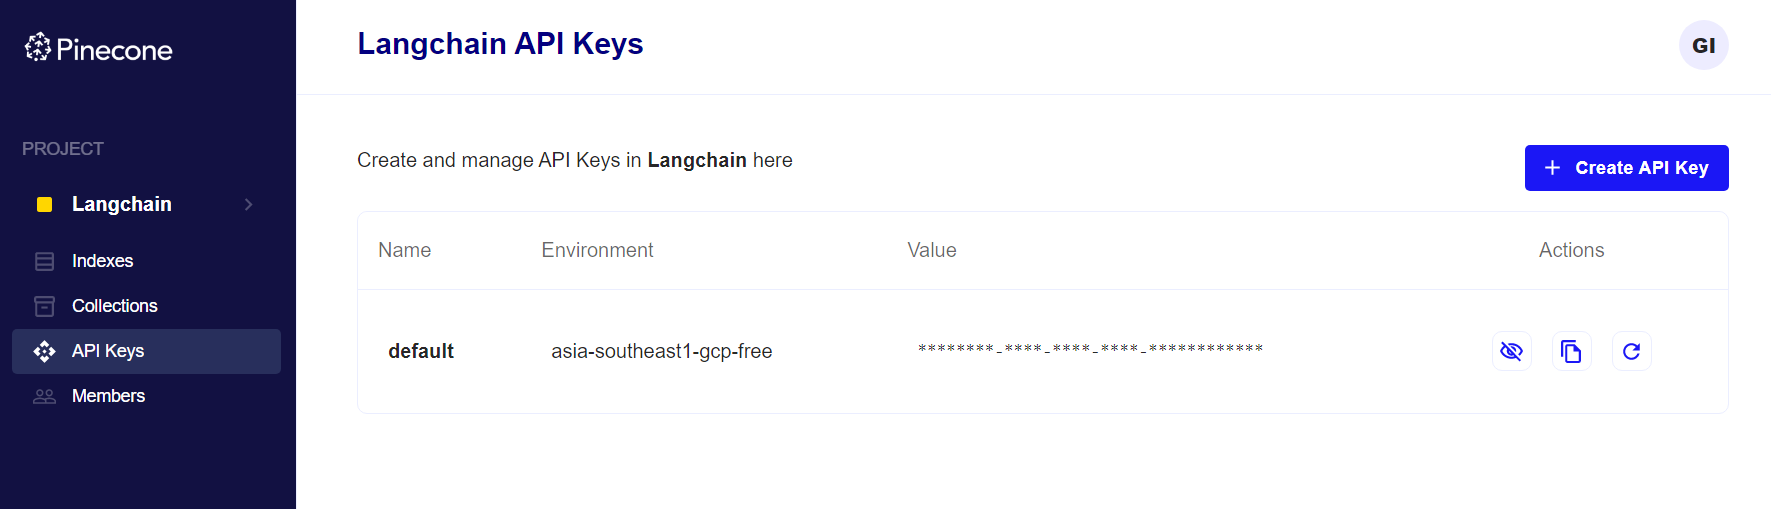

In [5]:
PINECONE_API_KEY = getpass("PINECONE API KEY : ")
PINECONE_ENV = getpass("PINECONE ENVIRONMENT NAME : ")
# PINECONE_INDEX_NAME = getpass("PINECONE INDEX NAME : ")

PINECONE API KEY : ··········
PINECONE ENVIRONMENT NAME : ··········


# 🔗 Add Website Links 🕸️
Add the websites pages you want to chat with

In [21]:
urls = [
    "https://www.understandingwar.org/backgrounder/russian-offensive-campaign-assessment-february-8-2023",
    "https://www.understandingwar.org/backgrounder/russian-offensive-campaign-assessment-february-9-2023"
]

# 🏗️ Process the site links and create index ⚒️

In [22]:
loader = UnstructuredURLLoader(urls=urls)
data = loader.load()

text_splitter = CharacterTextSplitter(chunk_size=1000, chunk_overlap=10)
docs = text_splitter.split_documents(data)

embeddings = OpenAIEmbeddings()

In [24]:
pinecone.init(api_key=PINECONE_API_KEY, environment=PINECONE_ENV)

# if you don't have an index
PINECONE_INDEX_NAME = "website"
pinecone.create_index(PINECONE_INDEX_NAME, dimension=1536)
docsearch = Pinecone.from_documents(docs, embeddings, index_name=PINECONE_INDEX_NAME)

# if you already have an index, you can load it like this
# docsearch = Pinecone.from_existing_index(index_name, embeddings)

# 🤖 Build Chatbot and Gradio App 🤖
Define the chat function that utilizes Langchain and OpenAI to process natural language queries and retrieve answers from the SQL database. Set up the Gradio app to provide a user-friendly interface for interacting with the chatbot

In [26]:
def chat(chat_history, user_input):
  docs = docsearch.similarity_search(user_input)
  bot_response = docs[0].page_content
  response = ""
  for letter in ''.join(bot_response): #[bot_response[i:i+1] for i in range(0, len(bot_response), 1)]:
      response += letter + ""
      yield chat_history + [(user_input, response)]

with gr.Blocks() as app:
    gr.Markdown('# Data Intelligence Bot')
    with gr.Tab("Knowledge Bot"):
        chatbot = gr.Chatbot()
        message = gr.Textbox ("Ask a question here...")
        message.submit(chat, [chatbot, message], chatbot)      

# ▶️ Run the Gradio App 🚀
Execute the Gradio app, allowing you to input queries and receive instant responses from the chatbot. The app provides a seamless experience for interacting with the SQL database

#### Open the link and start using

In [27]:
app.queue().launch(debug = True, share=True)

Colab notebook detected. This cell will run indefinitely so that you can see errors and logs. To turn off, set debug=False in launch().
Running on public URL: https://20bbb6e153b958feb3.gradio.live

This share link expires in 72 hours. For free permanent hosting and GPU upgrades (NEW!), check out Spaces: https://huggingface.co/spaces


Keyboard interruption in main thread... closing server.
Killing tunnel 127.0.0.1:7860 <> https://20bbb6e153b958feb3.gradio.live


# 📚 RESOURCES 📑

[Pinecone-Langchain Integration](https://python.langchain.com/en/latest/modules/indexes/vectorstores/examples/pinecone.html)

[Langchain-URL Loader](https://python.langchain.com/en/latest/modules/indexes/document_loaders/examples/url.html)

[Pinecone Quickstart](https://docs.pinecone.io/docs/quickstart)

[Gradio App](https://gradio.app/docs/)

[OpenAI API](https://platform.openai.com/account/api-keys)